In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
data = pd.read_csv('P:/python/Salary_data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data[data.duplicated()]

,YearsExperience,Salary


C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


{'whiskers': [<matplotlib.lines.Line2D at 0x2fa79243b20>,
 'caps': [<matplotlib.lines.Line2D at 0x2fa7924f220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2fa792437c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2fa7924f8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2fa7924fc40>],
 'means': []}

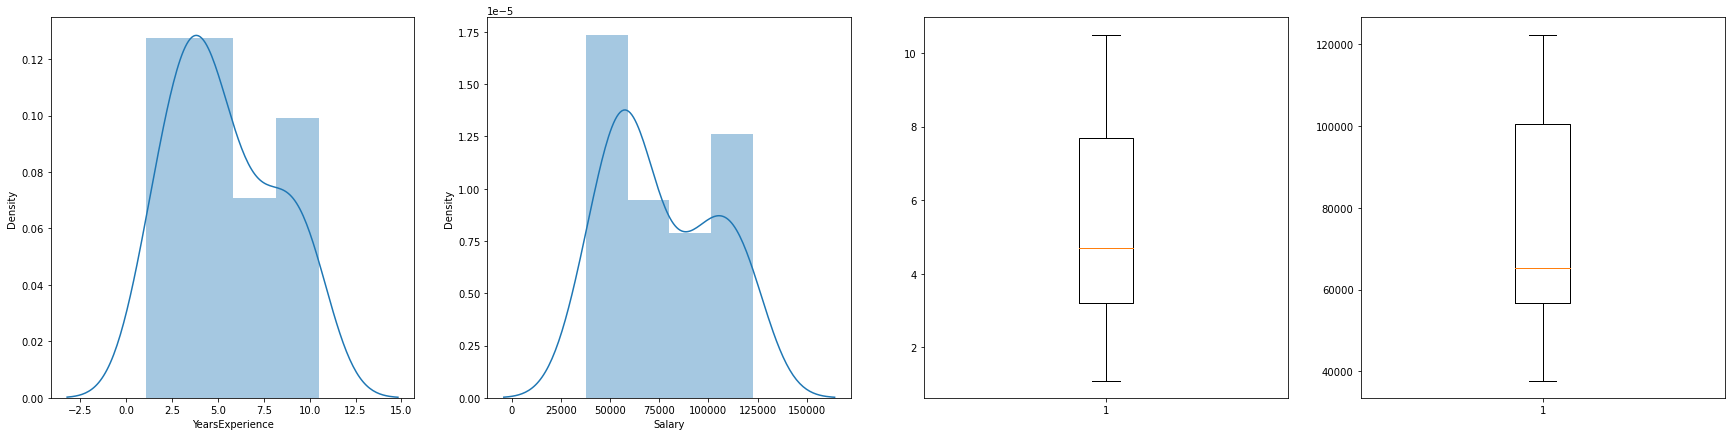

In [7]:
plt.subplots(figsize=(30,7))
plt.subplot(1,4,1)
sns.distplot(data.YearsExperience)
plt.subplot(1,4,2)
sns.distplot(data.Salary)
plt.subplot(1,4,3)
plt.boxplot(data.YearsExperience)
plt.subplot(1,4,4)
plt.boxplot(data.Salary)

Here the data is not clearly following normal distribution. Both years experience and salary are right skewed. And there is no outliers.

# Transformations

### For salary

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

Text(0.5, 1.0, 'poly')

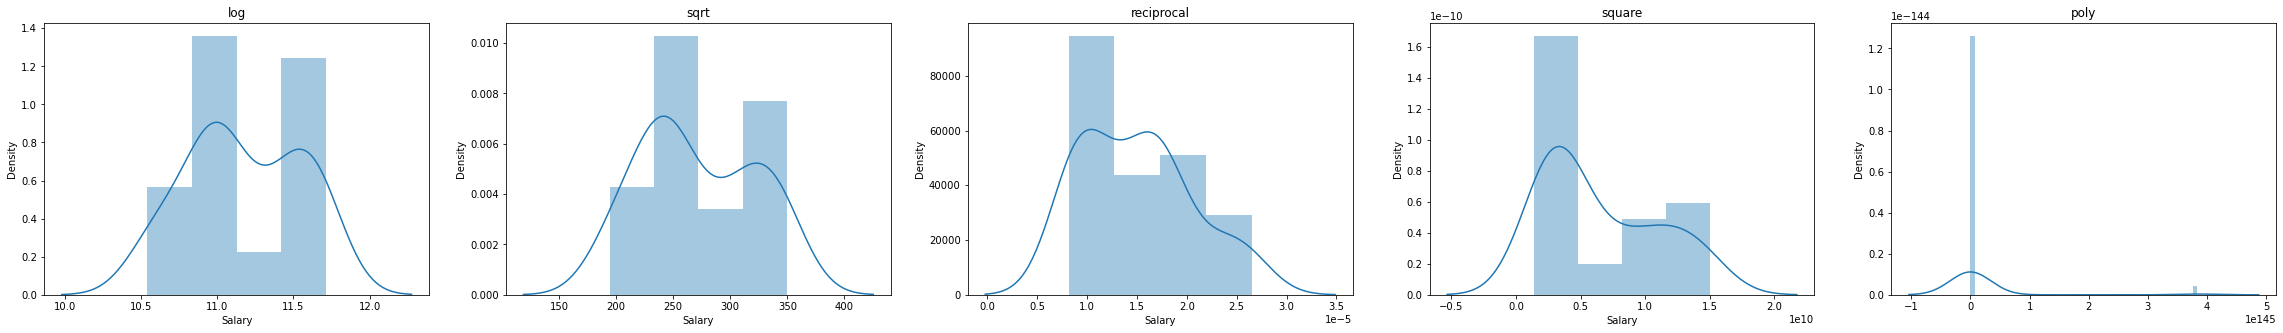

In [13]:
l1 = np.log(data.Salary)
s1 = np.sqrt(data.Salary)
r1 = np.reciprocal(data.Salary)
sq1 = np.square(data.Salary)
p1 = np.poly(data.Salary)
plt.subplots(figsize=(40,5))
plt.subplot(1,5,1)
sns.distplot(l1)
plt.title('log')
plt.subplot(1,5,2)
sns.distplot(s1)
plt.title('sqrt')
plt.subplot(1,5,3)
sns.distplot(r1)
plt.title('reciprocal')
plt.subplot(1,5,4)
sns.distplot(sq1)
plt.title('square')
plt.subplot(1,5,5)
sns.distplot(p1)
plt.title('poly')

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

Text(0.5, 1.0, 'poly')

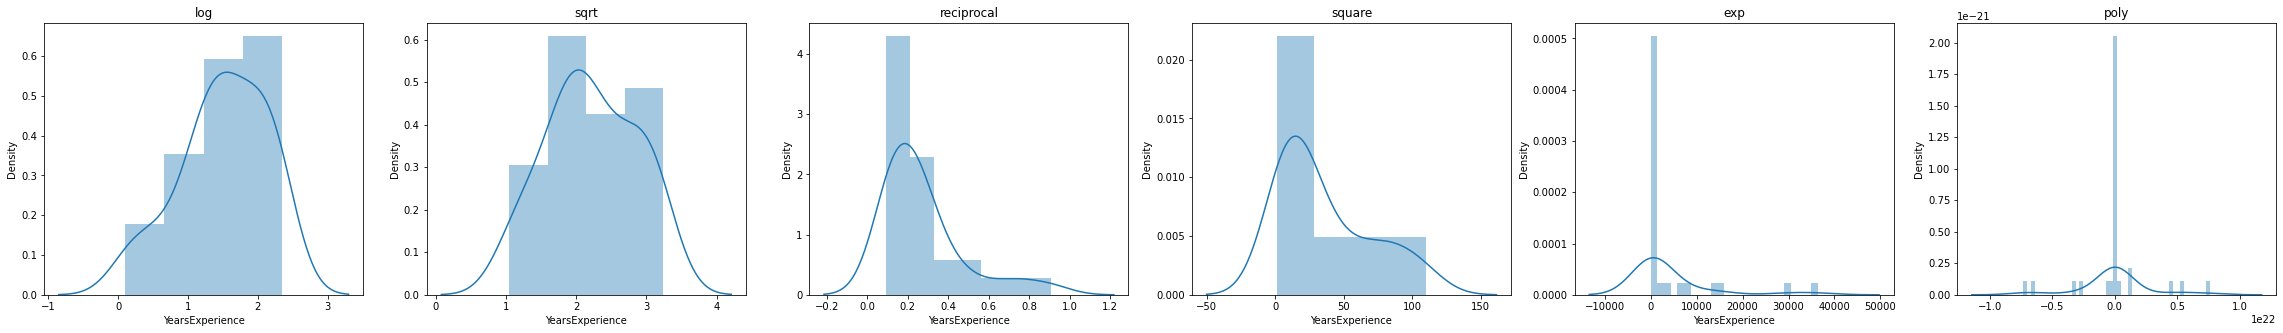

In [12]:
l = np.log(data.YearsExperience)
s = np.sqrt(data.YearsExperience)
r = np.reciprocal(data.YearsExperience)
sq = np.square(data.YearsExperience)
e = np.exp(data.YearsExperience)
p = np.poly(data.YearsExperience)
plt.subplots(figsize=(40,5))
plt.subplot(1,6,1)
sns.distplot(l)
plt.title('log')
plt.subplot(1,6,2)
sns.distplot(s)
plt.title('sqrt')
plt.subplot(1,6,3)
sns.distplot(r)
plt.title('reciprocal')
plt.subplot(1,6,4)
sns.distplot(sq)
plt.title('square')
plt.subplot(1,6,5)
sns.distplot(e)
plt.title('exp')
plt.subplot(1,6,6)
sns.distplot(p)
plt.title('poly')

After doing transformations also the data is not following normal distribution.

In [15]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

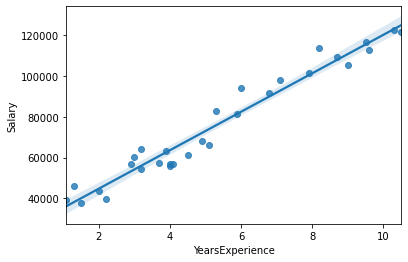

In [16]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

Here the data follows stright line so it is linear. And the direction is +ve. And also the strenth is stronger.

In [17]:
model = smf.ols('Salary~YearsExperience',data=data).fit()

In [18]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        16:52:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here R^2 value is 0.957 so the model is good model.

In [20]:
newdata = pd.Series([7])
pred_data = pd.DataFrame(newdata,columns=['YearsExperience'])
model.predict(pred_data)

0    91941.936449
dtype: float64

In [21]:
25792.20+9449.96*7

91941.92

In [22]:
preds = model.predict(data.YearsExperience)
preds

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [24]:
np.sqrt(np.mean((data.Salary - preds)**2))

5592.043608760661

Here the data is not following normal distribution. After doing the transformation also data is not following normal distribution. Then by builing model on it, the R^2 value is 0.957 and the R^2 > 0.8. So the model good model by seeing R^2 value. 